> **House prices: Linear Regression,Lasso Regression ,Ridge Regression and a detailed EDA**

1. Summary

2. Introduction

3. Loading and Exploring Data

    3.1 Loading libraries required and reading the data into Juypter notebook
    
    3.2 Dataset Structure
    
4. Exploring variables

5. Viewing all numeric and categorical features

6. Visualization

7. Taking care of missing data

   7.1 DataFrame containing the list of categories that have the most to least missing data
   
   7.2 Transforming data and feature engineering
   
8. Preparing data for modelling
   
9. Setting up train and test split

10. Modelling

    10.1 Linear Regression Model
    
    10.2 Lasso Regression Model
    
    10.3 Ridge Regression Model

## 1. Summary

We started this competition by just focusing on getting a good understanding of the dataset. The EDA is detailed and many visualizations are included. This version also includes modeling.

* Lasso regressions performs best with a cross validation RMSE-score of 0.0128.  Given the fact that there is a lot of multicolinearity among the variables, this was expected.
* We choose to check average predictors of lasso model beacuse it performed well than other models.


## 2. Introduction

The discription of competition on Kaggle is as follow:

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.


## 3. Loading and Exploring Data

### 3.1 Loading libraries and reading data into Juypter notebook

In [52]:
#Import all libraries
import numpy as np 
import pandas as pd 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

In [53]:
#Read and load Data
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

### 3.2 Dataset Structure

In [54]:
# View head of train
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [55]:
# View head of test
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [56]:
# View train columns
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [57]:
# View test columns
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [58]:
# Shape of train
train.shape

(1460, 81)

In [59]:
# Shape of test
test.shape

(1459, 80)

## 4. Exploring Variables

In [60]:
#Info on our target variable
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

**Target variable: SalePrice**

We can see from the details above that the range of values are distributed quite widely.
Plotting the skewness and kurtosis of the target variable will give us a better understanding about its distribution.


Skew is: 1.8828757597682129
Kurtosis : 6.536282


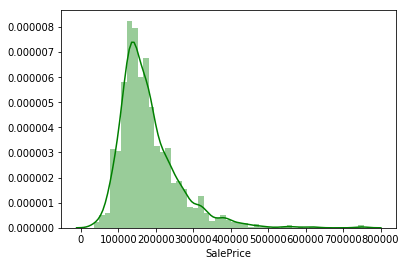

In [61]:
#Plot Histogram for 'SalePrice'
print ("Skew is:", train.SalePrice.skew())
print("Kurtosis : %f" % train['SalePrice'].kurt())
sns.distplot(train['SalePrice'], color = 'green')
plt.show()

Since our target variable is skewed to the right we have to bring it back to normality - Log-Transformation

Skewness : 0.121347
Kurtosis : 0.809519


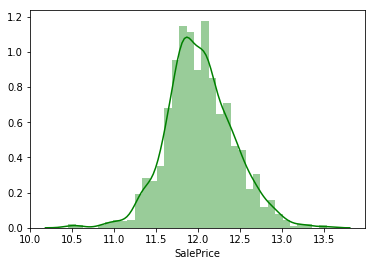

In [62]:
#Skewness and Kurtosis - After log-transformation
target = np.log1p(train.SalePrice)
print("Skewness : %f" % target.skew())
print("Kurtosis : %f" % target.kurt())
sns.distplot(target, color = 'green')
plt.show()

## 5. Viewing all numeric and categorical features

In [63]:
# Displaying of all numerical features
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [64]:
# Displaying of all categorical features
categorical_features = train.select_dtypes(include=[np.object])
categorical_features.dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

Finding all numeric feature correlations to our target variable

In [65]:
#Finding the correlations of in numeric features
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

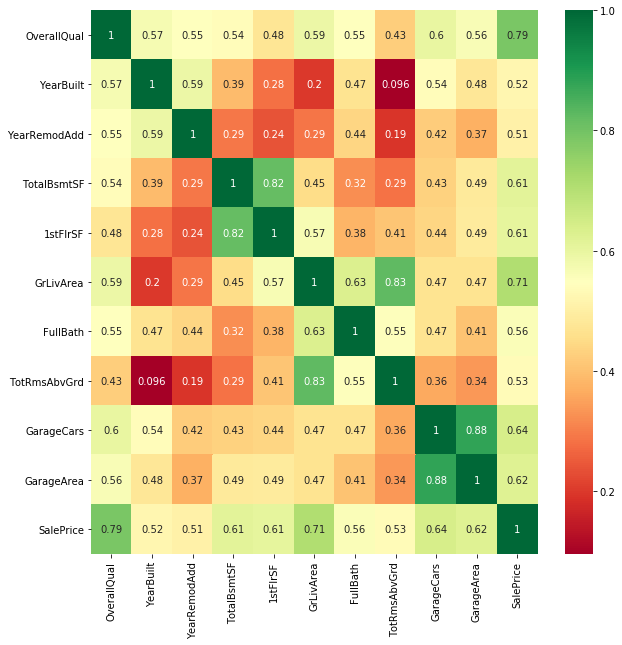

In [66]:
# Most correlated variables to clean outliers
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## 6. Visualizations

**Overall Quality**

Overall Quality has the highest correlation with SalePrice among the numeric variables (0.79). It rates the overall material and finish of the house on a scale from 1 (very poor) to 10 (excellent).

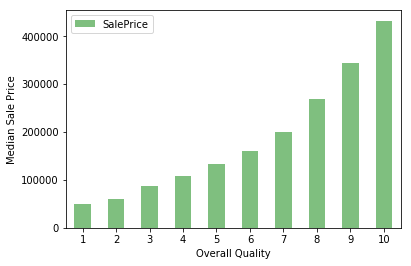

In [67]:
# Compare 'SalePrice' and Overall Quality
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar', color='green', alpha = 0.5)
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

From the graph above the Median SalePrice increases uniformly increases as Overall Quality increases.

Below are some other interesting findings between our target variable and other independent variables

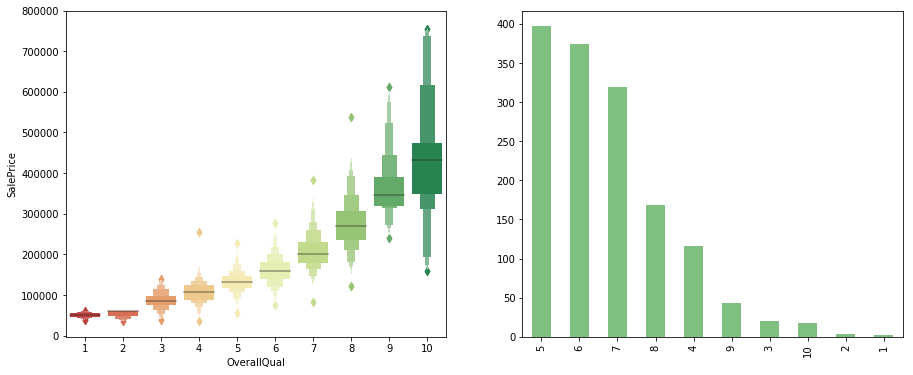

In [68]:
# SalePrice vs OverallQual - Graph on right shows most sought after houses are quality of 5
plt.figure(figsize= (15,6))
plt.subplot(121)
sns.boxenplot(train['OverallQual'], train['SalePrice'],palette="RdYlGn")
plt.subplot(122)
train['OverallQual'].value_counts().plot(kind="bar",color = 'green', alpha = 0.5)

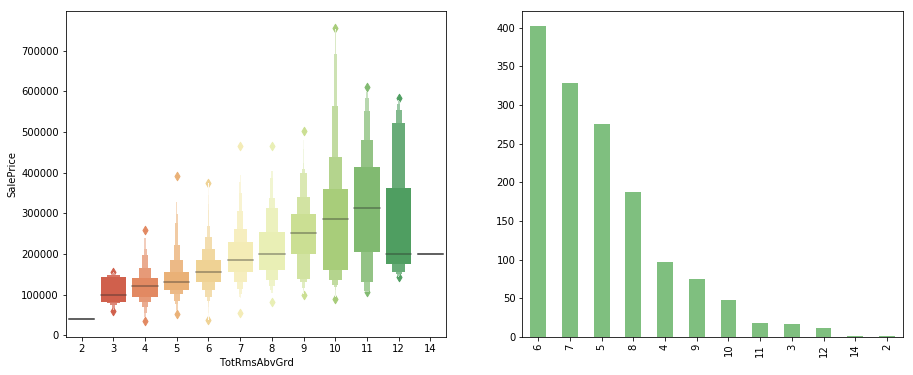

In [69]:
# Houses with 6 rooms above ground are most in demand - SalePrice is also competitive mostly cheaper than 5 rooms
plt.figure(figsize= (15,6))
plt.subplot(121)
sns.boxenplot(train['TotRmsAbvGrd'], train['SalePrice'], palette="RdYlGn")
plt.subplot(122)
train['TotRmsAbvGrd'].value_counts().plot(kind="bar",color = 'green', alpha = 0.5)

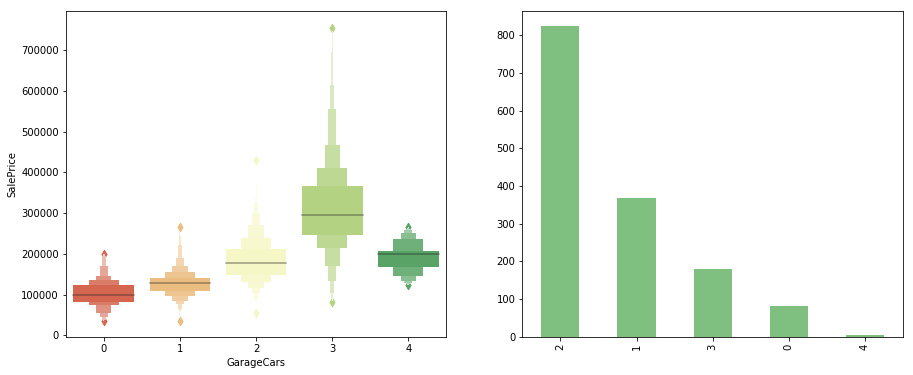

In [70]:
# Two garage houses are the most prevalent, interestingly four garages SalePrice drops considerably
plt.figure(figsize= (15,6))
plt.subplot(121)
sns.boxenplot(train['GarageCars'], train['SalePrice'],palette="RdYlGn")
plt.subplot(122)
train['GarageCars'].value_counts().plot(kind="bar",color = 'green', alpha = 0.5)

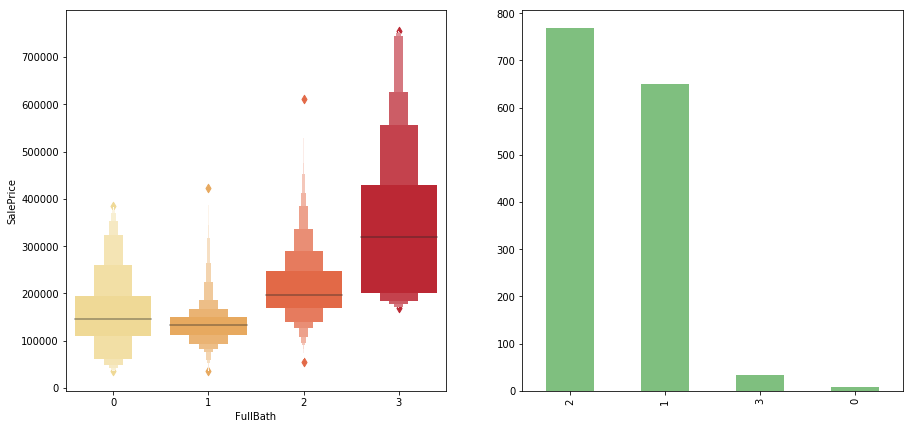

In [71]:
# Houses with 1 or 2 full bathrooms seems to be the most prevalent, 3 full bathrooms only available in more expensive homes
plt.figure(figsize= (15,7))
plt.subplot(121)
sns.boxenplot(train['FullBath'], train['SalePrice'],palette='YlOrRd')
plt.subplot(122)
train['FullBath'].value_counts().plot(kind="bar",color = 'green', alpha = 0.5)

 **GrLivArea**
 
The numeric variable with the second highest correlation with SalesPrice is the Above Ground Living Area. This make a lot of sense; big houses are generally more expensive.

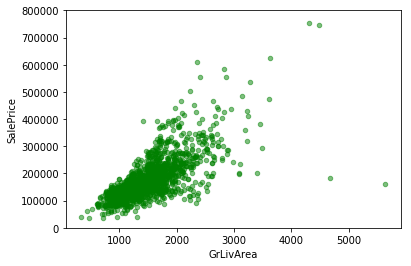

In [72]:
#Analyse SalePrice/GrLiveArea
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis = 1)
data.plot.scatter(x ='GrLivArea', y= 'SalePrice', ylim = (0,800000), c= 'green', alpha = 0.5)

We generated a scatter plot to visualize the relationship between t(GrLivArea) and SalePrice. As mentioned in the documentation we find some outliers that needs to be taken care of.

In [73]:
# Remove outliers from GrLivArea
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice']< 4000000)].index)

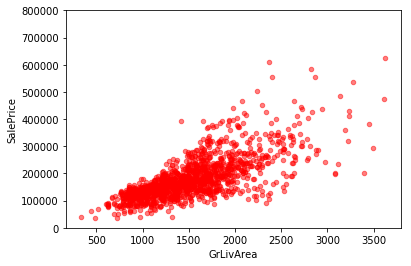

In [74]:
# After outliers have been removed
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis = 1)
data.plot.scatter(x ='GrLivArea', y= 'SalePrice', ylim = (0,800000), c= 'red', alpha = 0.5)

Some other outliers below that also need to be taken care of.

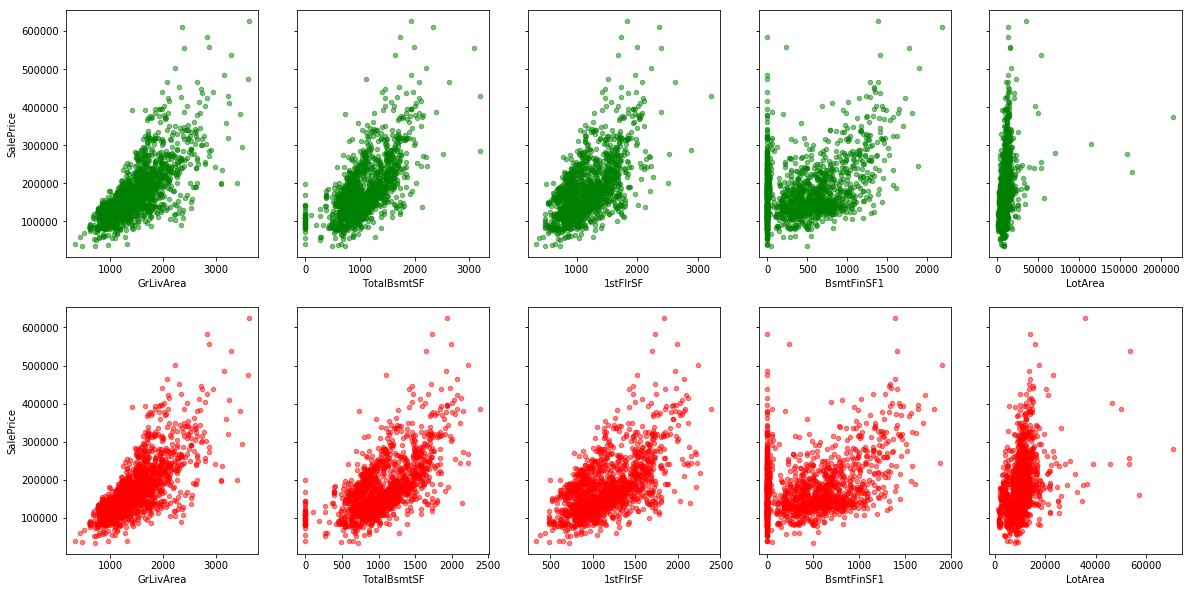

In [75]:
# Plot all figures where possible outliers remain
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
axes = np.ravel(axes)
col_name = ['GrLivArea','TotalBsmtSF','1stFlrSF','BsmtFinSF1','LotArea']
for i, c in zip(range(5), col_name):
    train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, color='green', alpha = 0.5)

# Delete outliers for affected columns
train = train[train['GrLivArea'] < 4000]
train = train[train['LotArea'] < 100000]
train = train[train['TotalBsmtSF'] < 3000]
train = train[train['1stFlrSF'] < 2500]
train = train[train['BsmtFinSF1'] < 2000]

# Loop to   
for i, c in zip(range(5,10), col_name):
    train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, color='red', alpha = 0.5)

As previously mentioned our target variable is skewed - We will now log transform our train dataset target variable.

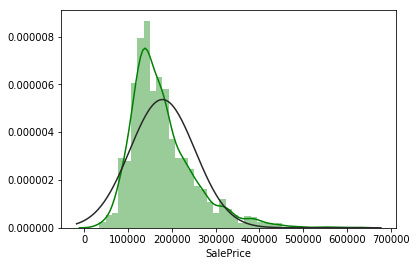

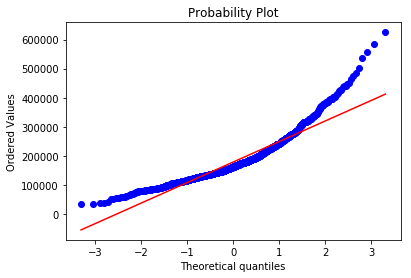

In [76]:
# Distribution is skewed to the right - Does not follow a normal distribution
# QQ plot confirms
sns.distplot(train['SalePrice'], fit = norm, color='green')
fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot = plt)

In [77]:
#Log transformation - log(1+x) to account for smaller rounding errors
train['SalePrice'] = np.log1p(train['SalePrice'])

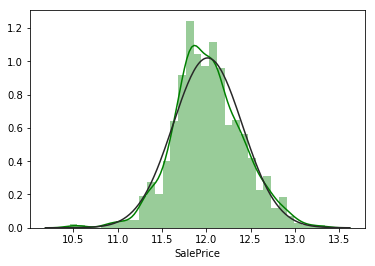

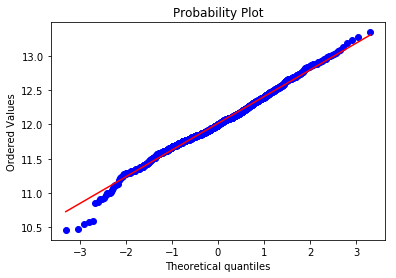

In [78]:
# Distribution is now more fitted to a normal distribution after log-transformation
sns.distplot(train['SalePrice'], fit = norm, color = 'green')
fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot = plt)

Target variable now log transformed. QQ-plot confirms values are more linearly distributed.

## 7. Taking care of missing data

### 7.1 DataFrame containing the list of categories that have the most to least missing data

In [79]:
# Show total amount of missing data
total = train.isnull().sum().sort_values(ascending = False)

# Show percentage of missing data
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending = False)

# Concatenate new columns in dataframe
missing_data = pd.concat([total,percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1439,0.996537
MiscFeature,1392,0.963989
Alley,1353,0.936981
Fence,1165,0.806787
FireplaceQu,690,0.477839
LotFrontage,252,0.174515
GarageCond,81,0.056094
GarageType,81,0.056094
GarageYrBlt,81,0.056094
GarageFinish,81,0.056094


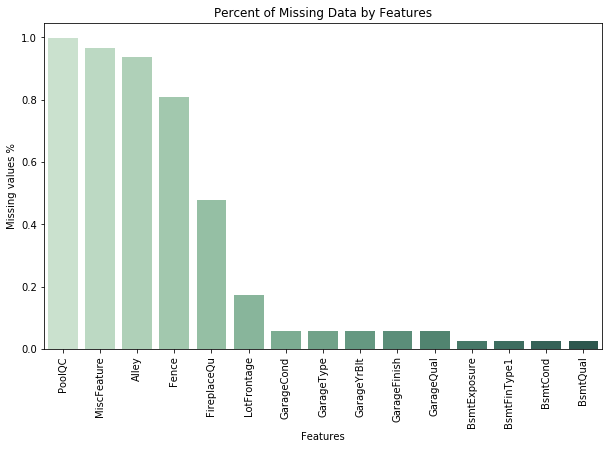

In [80]:
# Visualising missing data
f, ax = plt.subplots(figsize=(10,6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.head(15).index, y=missing_data.head(15)['Percent'], palette="ch:2.5,-.2,dark=.3")
plt.xlabel('Features')
plt.ylabel('Missing values %')
plt.title('Percent of Missing Data by Features')
plt.savefig('missingdata.png')
plt.show()

In [81]:
# View of categorical variables details - train dataset
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1444,1444,91,1444,1444,1444,1444,1444,1444,1444,1444,1444,1444,1444,1444,1444,1444,1437,1444,1444,1444,1407,1407,1406,1407,1407,1444,1444,1444,1443,1444,1444,754,1363,1363,1363,1363,1444,5,279,52,1444,1444
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,7,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1135,1439,50,922,1301,1443,1044,1370,225,1247,1430,1205,716,1136,1422,511,500,858,903,1266,636,647,1295,949,430,1245,1413,731,1349,1318,732,1345,369,855,604,1295,1310,1324,2,155,47,1255,1188


In [82]:
# View of categorical variables details - test dataset
cate = test.select_dtypes(exclude=[np.number])
cate.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1459,107,1459,1459,1457,1459,1459,1459,1459,1459,1459,1459,1459,1459,1458,1458,1443,1459,1459,1459,1415,1414,1415,1417,1417,1459,1459,1459,1459,1458,1457,729,1383,1381,1381,1381,1459,3,290,51,1458,1459
unique,5,2,2,4,4,1,5,3,25,9,5,5,7,6,4,13,15,4,4,5,6,4,4,4,6,6,4,5,2,4,4,7,5,6,3,4,5,3,2,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1114,1453,70,934,1311,1457,1081,1396,218,1251,1444,1205,745,1169,1442,510,510,878,892,1256,661,634,1295,951,431,1237,1446,752,1358,1337,757,1357,364,853,625,1293,1328,1301,2,172,46,1258,1204


In [32]:
# Run for loop for view of all categorical variables and unique identifiers
for c in categoricals.columns:
    print('{:<14}'.format(c), train[c].unique())

MSZoning       ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street         ['Pave' 'Grvl']
Alley          [nan 'Grvl' 'Pave']
LotShape       ['Reg' 'IR1' 'IR2' 'IR3']
LandContour    ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities      ['AllPub' 'NoSeWa']
LotConfig      ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope      ['Gtl' 'Mod' 'Sev']
Neighborhood   ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1     ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2     ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosA' 'PosN' 'RRAn' 'RRAe']
BldgType       ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle     ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle      ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl       ['CompShg' 'WdShngl' 'Metal' 'Wd

### 7.2 Transforming data and feature engineering

In [33]:
# Label Encoding categorical features
columns = ('MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition')

# Apply LabelEncoder to all columns above
for i in columns:
    lbl = LabelEncoder() 
    lbl.fit(list(train[i].values)) 
    train[i] = lbl.transform(list(train[i].values))
    lbl.fit(list(test[i].values)) 
    test[i] = lbl.transform(list(test[i].values))

In [34]:
# Remove features that are not of any use to value the target variable
train=train.drop(columns=['Street','Utilities','Condition2','RoofMatl','Heating','PoolArea','PoolQC','MiscVal','MiscFeature'])
test=test.drop(columns=['Street','Utilities','Condition2','RoofMatl','Heating','PoolArea','PoolQC','MiscVal','MiscFeature'])

In [83]:
# Remove any columns up to 0.70 missing values in both training and test dataset
train = train.dropna(thresh=0.70*len(train), axis=1)
test = test.dropna(thresh=0.70*len(test), axis=1)

## 8. Preparing data for modelling

In [37]:
#We have to remove any missing data to make our model more robust - free from errors in the modelling phase
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [38]:
#Setting up x and y variables  - ready for modelling
y = train.SalePrice
X = data.drop(['SalePrice', 'Id'], axis=1)

## 9. Setting up train and test split

In [39]:
#Firstly setting up of our train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state =1)

## 10. Modelling

### 10.1 Linear Regression

In [40]:
#Linear Regression
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Create linear regression 
lm = linear_model.LinearRegression()

#Train the model using the training sets
lm.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = lm.predict(X_test)
print('The accuracy of the Linear Regression is',r2_score(y_test,y_pred))
print ('RMSE is: ', mean_squared_error(y_test, y_pred))

The accuracy of the Linear Regression is 0.910226187033199
RMSE is:  0.013111108298293794


In [41]:
# Ready for submission
submission = pd.DataFrame()
submission['Id'] = test.Id
feats = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()
predictions = lm.predict(feats)
lm_predictions = np.exp(predictions)

In [42]:
# Print results and save results to csv
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", lm_predictions[:5])
submission['SalePrice'] = lm_predictions
submission.head()
submission.to_csv('Linear Regression.csv', index=False)

Original predictions are: 
 [11.70970865 11.97158788 12.0934929  12.19012095 12.14138501] 

Final predictions are: 
 [121748.00411866 158195.65649386 178705.21734342 196834.97169778
 187472.04331852]


### 10.2 Lasso Regression

In [43]:
# Lambda values for lasso fit
lambda_values = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.3, 1]

# Train lasso
def train_lasso(X, Y, alpha):
    lasso = Lasso(alpha=alpha, max_iter=1000)
    lasso = lasso.fit(X, Y)
    return lasso

lasso_models = []

# Iterate lambda_values to train
for alpha in lambda_values:
    l = train_lasso(X_train, y_train, alpha)
    lasso_models.append(l)
    
# Return score for each lambda iteration    
for i, alpha in enumerate(lambda_values):
    print('Lambda value: ',alpha)
    y_pred_lasso = lasso_models[i].predict(X_test)
    print('The accuracy of the Linear Regression is',r2_score(y_test,y_pred_lasso))
    print ('RMSE is: ', mean_squared_error(y_test, y_pred_lasso))
    print('\n')

Lambda value:  0.0001
The accuracy of the Linear Regression is 0.9106428353094052
RMSE is:  0.013050258474819595


Lambda value:  0.001
The accuracy of the Linear Regression is 0.9116747598457315
RMSE is:  0.012899550000885822


Lambda value:  0.01
The accuracy of the Linear Regression is 0.8995189231451834
RMSE is:  0.01467486159978382


Lambda value:  0.05
The accuracy of the Linear Regression is 0.8287164820354274
RMSE is:  0.02501527649913617


Lambda value:  0.1
The accuracy of the Linear Regression is 0.8153858733710925
RMSE is:  0.026962158870556707


Lambda value:  0.3
The accuracy of the Linear Regression is 0.8146890311069146
RMSE is:  0.02706392991147086


Lambda value:  1
The accuracy of the Linear Regression is 0.8053282471259866
RMSE is:  0.028431035178307043




In [44]:
# Ready for submission
submission = pd.DataFrame()
submission['Id'] = test.Id
feats = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()
lasso_predictions = lasso_models[1].predict(feats)
final_lasso = np.exp(lasso_predictions)

In [45]:
# Print results and save results to csv
print ("Original predictions are: \n", lasso_predictions[:5], "\n")
print ("Final lasso predictions are: \n", final_lasso[:5])
submission['SalePrice'] = final_lasso
submission.head()
submission.to_csv('Lasso_Regression.csv', index=False)

Original predictions are: 
 [11.72999076 11.97581183 12.09289872 12.19155413 12.13405812] 

Final lasso predictions are: 
 [124242.52247874 158865.27983525 178599.06633491 197117.27307365
 186103.47511193]


### 10.3 Ridge Regression

In [46]:
#Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Create Ridge regression 
ridge = Ridge()

#Train the model using the training sets
ridge.fit(X_train, y_train)
b = float(ridge.intercept_)
coeff = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])
print("Intercept:", float(b))

# Make predictions using the testing set - Ridge Regression
test_ridge = ridge.predict(X_test)
print('The accuracy of the Ridge Regression is', r2_score(y_test, test_ridge))
print ('RMSE is: ', mean_squared_error(y_test, test_ridge))

Intercept: 19.197068854583488
The accuracy of the Ridge Regression is 0.9103765072877872
RMSE is:  0.013089154623027038


In [47]:
# Ready for submission
submission = pd.DataFrame()
submission['Id'] = test.Id
feats = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()
predictions = ridge.predict(feats)
final_ridge = np.exp(predictions)

In [48]:
# Print results and save results to csv
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_ridge[:5])
submission['SalePrice'] = final_ridge
submission.head()
submission.to_csv('Ridge_Regression.csv', index=False)

Original predictions are: 
 [11.71020203 11.97166447 12.09377082 12.19038917 12.14103282] 

Final predictions are: 
 [121808.08754056 158207.77341233 178754.89063236 196887.77373746
 187406.02968462]
